# ProcessOptimize examples

Sigurd carlsen 20 feb 2019

This notebook serves to showcase the new features that are being added to the scikit-optimize fork: ProcessOptimizer

In [1]:
# We append to system path as we are not using the pip version of ProcessOptimizer. 
# Be sure to inser the correct path to ProcessOptimizer here:

import sys
sys.path.append('/home/sigurd/dev/ProcessOptimizer')
from ProcessOptimizer.benchmarks import branin as branin
from ProcessOptimizer.benchmarks import hart6 as hart6_
from ProcessOptimizer.plots import plot_objective
from ProcessOptimizer import gp_minimize, forest_minimize, dummy_minimize
from ProcessOptimizer import plots

In [2]:
# For reproducibility
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

<Figure size 432x288 with 0 Axes>

# plot_objective

Plot objective now supports optional use of partial dependence as well as different methods of defining parameter values for dependency plots

In [3]:
# Here we define a function that we evaluate.
def funny_func(x):
    s = 0
    for i in range(len(x)):
        s += (x[i]*i)**2
    return s

In [4]:
# We run forest_minimize on the function
bounds = [(-2, 2.),] * 4
n_calls = 40

result = forest_minimize(funny_func, bounds, n_calls=n_calls, base_estimator="ET",
                             random_state=4)

Here we see an example of using partial dependence. Even when setting n_points all the way down to 10 from the default of 40, this method is still very slow. This is because partial dependence calculates 250 extra predictions for each point on the plots.

In [5]:
from scipy.optimize import minimize as sp_minimize

In [6]:
n_random_starts=20
random_state=None

In [7]:
res=result

In [8]:
def func(x):
        reg = res.models[-1]
        x = res.space.transform(x.reshape(1, -1))
        return reg.predict(x.reshape(1, -1))[0]

In [9]:
xs = [res.x]
if n_random_starts > 0:
    xs.extend(res.space.rvs(n_random_starts, random_state=random_state))

In [10]:
best_x = None
best_fun = np.inf

In [11]:
x0=xs[0]

In [18]:
x0

[-1.2319962700746434,
 0.28696398269002277,
 -0.1986255360664715,
 0.14392520878029735]

In [17]:
res.space.transform([x0])

array([[-1.23199627,  0.28696398, -0.19862554,  0.14392521]])

In [12]:
r = sp_minimize(func, x0=x0, bounds=res.space.bounds)

In [13]:
r

      fun: 4.338655047680157
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 5
      nit: 0
   status: 0
  success: True
        x: array([-1.23199627,  0.28696398, -0.19862554,  0.14392521])

In [14]:
bounds=res.space.bounds

In [15]:
bounds

[(-2, 2.0), (-2, 2.0), (-2, 2.0), (-2, 2.0)]

In [13]:
for x0 in xs:
    r = sp_minimize(func, x0=x0, bounds=res.space.bounds)

    if r.fun < best_fun:
        best_x = r.x
        best_fun = r.fun

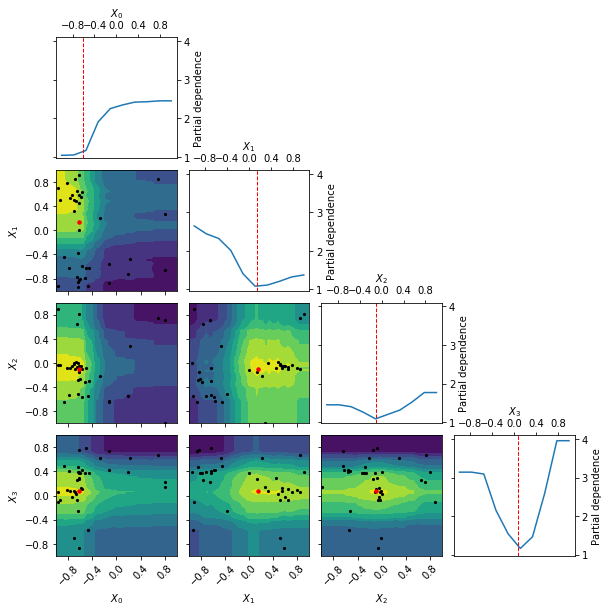

In [6]:
_ = plot_objective(result,usepartialdependence = True, n_points = 10)

Here we plot without partial dependence. We see that it is a lot faster. Also the values for the other parameters are set to the default "result" which is the parameter set of the best observed value so far. In the case of funny_func this is close to 0 for all parameters.

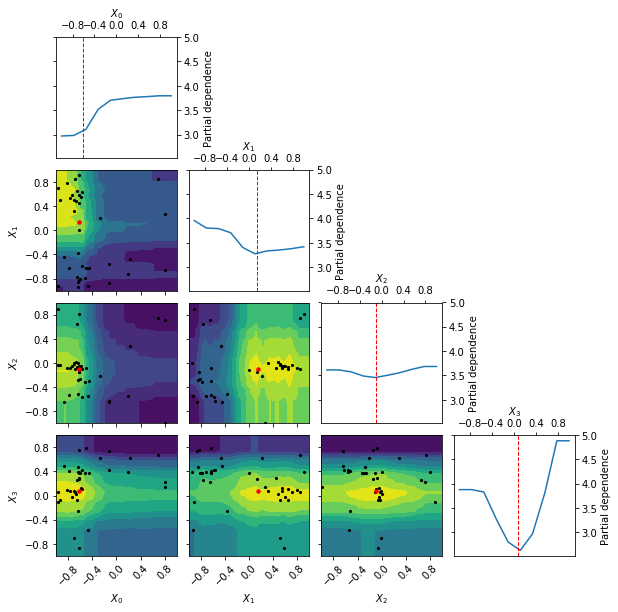

In [7]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10)

Here we try with setting the other parameters to something other than "result". First we try with "expected_minimum" which is the set of parameters that gives the miniumum value of the surogate function, using scipys minimum search method.

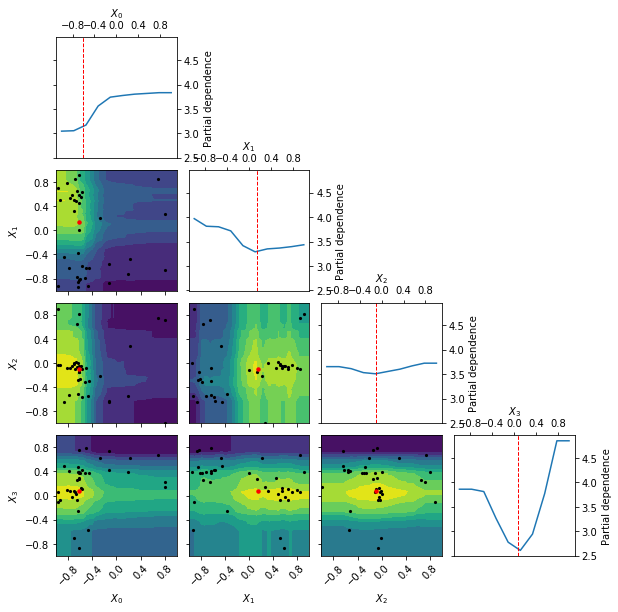

In [8]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = 'expected_minimum')

"expected_minimum_random" is a naive way of finding the minimum of the surogate by only using random sampling:

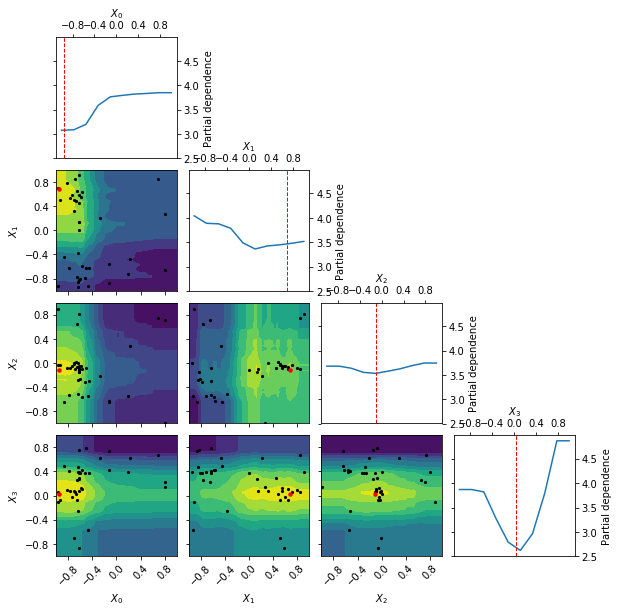

In [5]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = 'expected_minimum_random')

Lastly we can also define these parameters ourselfs by parsing a list as the pars argument:

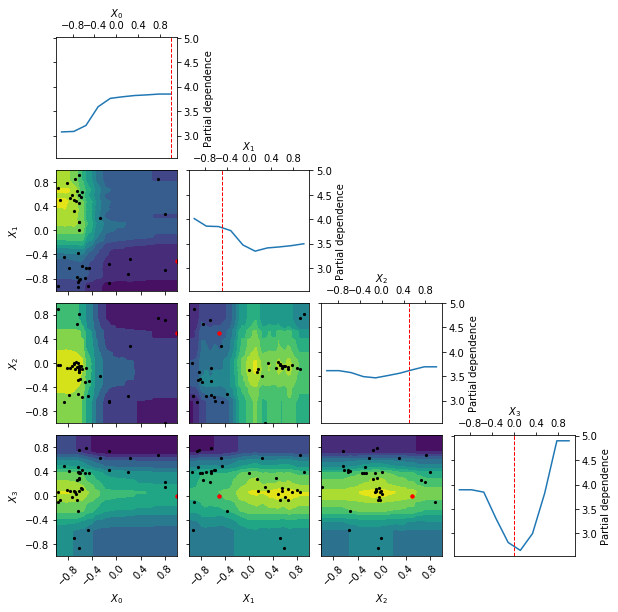

In [6]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = [1,-0.5,0.5,0])

We can also specify how many intial samples are used for the two different "expected_minimum" methods. We set it to a low value in the next examples to showcase how it affects the minimum for the two methods.

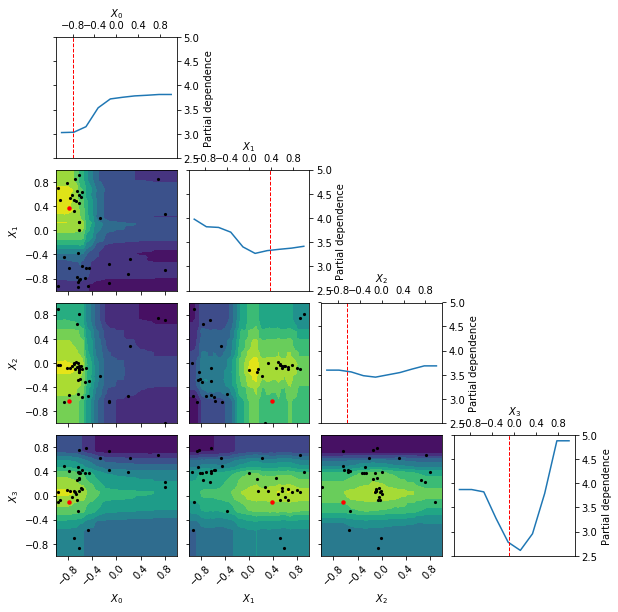

In [7]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = 'expected_minimum_random',expected_minimum_samples = 10)

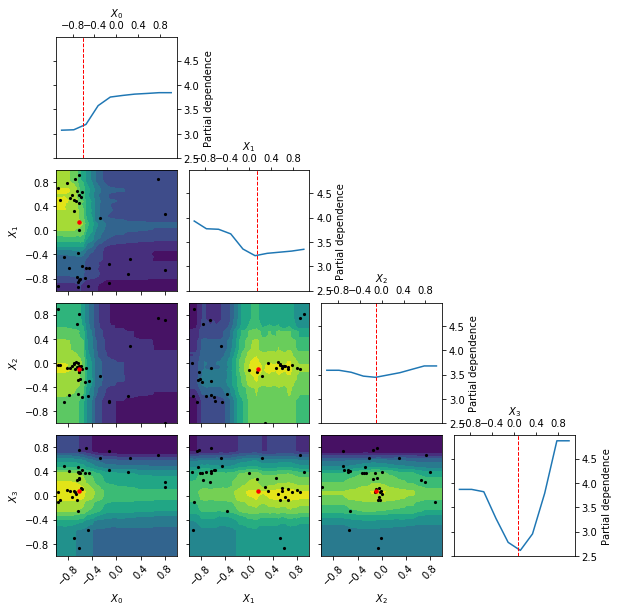

In [8]:
_ = plot_objective(result,usepartialdependence = False, n_points = 10,pars = 'expected_minimum',expected_minimum_samples = 1)